<a href="https://colab.research.google.com/github/ducnguyen1704/TienXuLyDuLieu/blob/master/TH%E1%BB%B0C_H%C3%80NH_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Thực hành] Phân tích review của khách hàng

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/26023345/Credit_Scoring.csv")
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
6,15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
7,16,0,0.548458,64,0,0.209892,11362.0,7,0,1,0,2.0
8,17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
9,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0


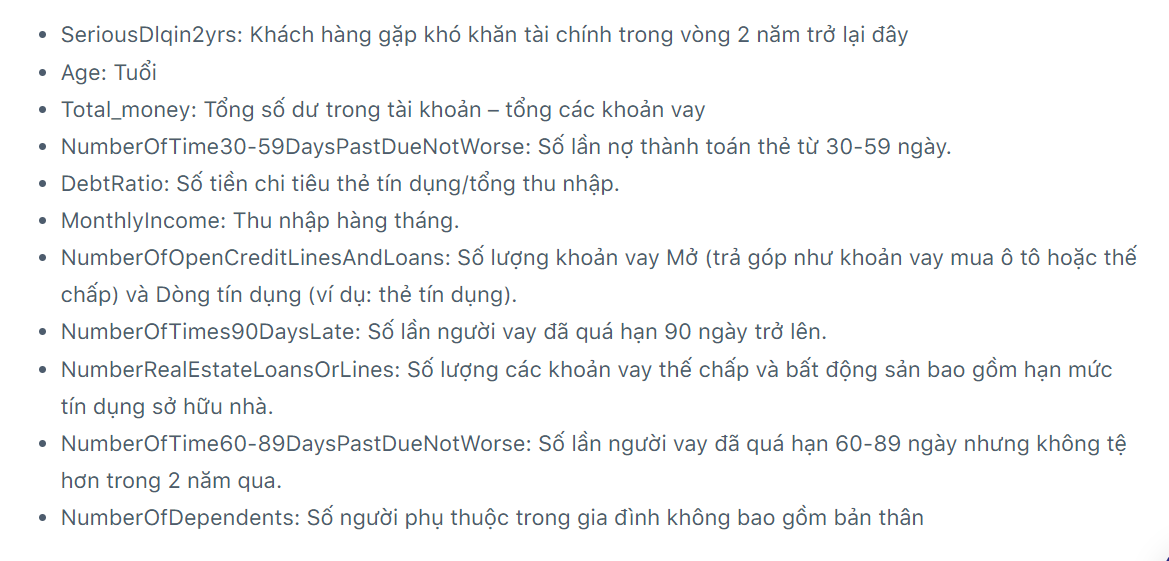

In [3]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [4]:
# mô tả dữ liệu
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
# kiểm tra dữ liệu khuyết thiếu
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# loại bỏ dữ liệu khuyết thiếu
df1 = df.dropna()

In [8]:
# % số lượng bản ghi còn lại
df1.shape[0]/df.shape[0] * 100

80.17894287695344

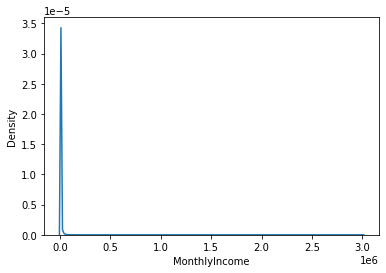

In [9]:
# vẽ biểu đồ phân bố
sns.kdeplot(data=df1["MonthlyIncome"])

In [10]:
# thay thế dữ liệu khuyết thiếu bởi giá trị nội suy theo cột
df2 = df.interpolate(axis=1)

In [11]:
df2.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,False,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


Xử lý dữ liệu ngoại lai

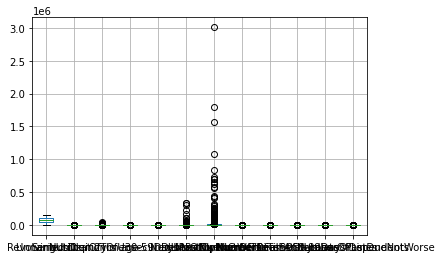

In [12]:
# vẽ biểu đồ boxplot cho các đặc trưng
df2.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


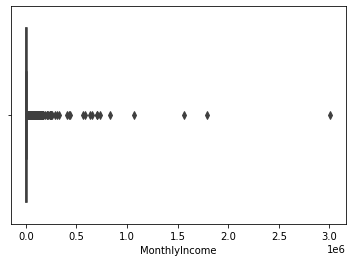

In [13]:
# vẽ biểu đồ box plot cho MonthlyIncome
sns.boxplot(df2["MonthlyIncome"])

In [14]:
# tính giá trị Q1 và Q3
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

In [15]:
# tính IQR 
IQR = Q3-Q1

In [16]:
# lọc dữ liệu ngoại lai
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

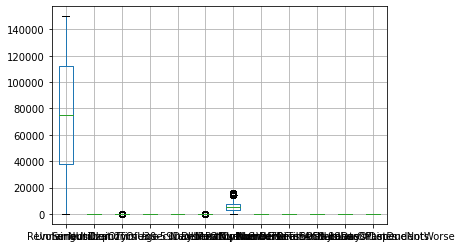

In [17]:
df3.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


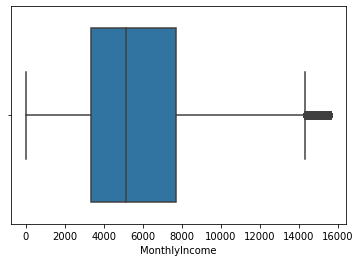

In [18]:
sns.boxplot(df3["MonthlyIncome"])

In [19]:
df3.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76890.000000,76890.0,76890.000000,76890.000000,76890.0,76890.000000,76890.000000,76890.000000,76890.0,76890.000000,76890.0,76890.000000
mean,75092.319508,0.0,0.264318,52.929185,0.0,0.317611,5714.681226,8.049395,0.0,0.931552,0.0,0.518390
std,43259.698005,0.0,0.317195,15.385704,0.0,0.281695,3249.853682,4.299490,0.0,0.942512,0.0,0.743525
min,11.000000,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,37747.250000,0.0,0.023148,41.000000,0.0,0.111378,3312.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,75268.500000,0.0,0.111537,53.000000,0.0,0.268449,5125.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,112463.750000,0.0,0.417336,64.000000,0.0,0.443096,7705.750000,11.000000,0.0,2.000000,0.0,1.000000
max,150000.000000,0.0,1.341700,96.000000,0.0,1.908046,15605.000000,20.000000,0.0,5.000000,0.0,2.000000


Chuẩn hóa dữ liệu

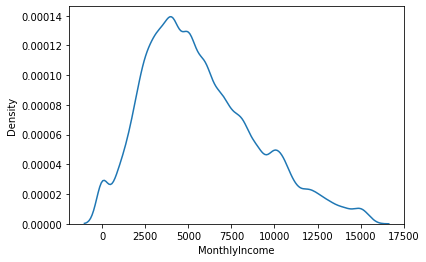

In [20]:
# phân bố dữ liệu trên cột MonthlyIncome
sns.kdeplot(data = df3['MonthlyIncome'])

In [21]:
# chuẩn hóa với minmax scaling
scaler = MinMaxScaler()

mms = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

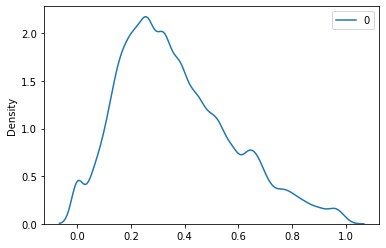

In [22]:
sns.kdeplot(data = mms)

In [23]:
# chuẩn hóa với robust scaling
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

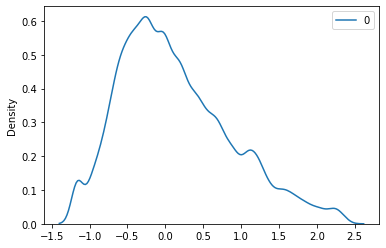

In [24]:
sns.kdeplot(data = rbs)

In [25]:
# chuẩn hóa với standard scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

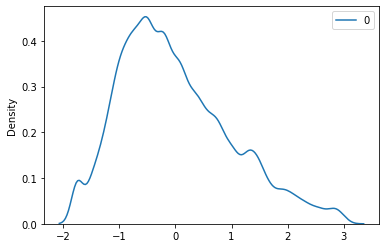

In [26]:
sns.kdeplot(data = sc)